<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(0)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0'

In [4]:
os.listdir(base_path)

['data_add_delta_0_n20.csv',
 'data_add_delta_0_n30.csv',
 'data_add_delta_0_n60.csv',
 'data_add_delta_0_n120.csv',
 'data_add_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.001457,42.068164,86.744186,0.730108,227.543916,226.775690,0.768226
1,0.0,1.0,32.468207,68.509050,88.230753,1.632376,200.840387,199.261760,1.578627
2,0.0,2.0,92.914756,38.108065,38.471231,-0.048523,179.445530,179.340335,0.105195
3,0.0,3.0,71.190212,40.379026,64.371622,-0.015694,185.925167,185.874362,0.050805
4,0.0,4.0,55.436400,34.440822,94.547367,-0.124391,194.300198,194.442093,-0.141895
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,97.049733,57.722371,33.992889,0.530284,199.295276,198.652656,0.642620
249996,999.0,246.0,82.849004,31.140243,35.791249,-1.011109,158.769387,159.709181,-0.939794
249997,999.0,247.0,40.297513,42.231566,99.136035,1.447301,193.112415,191.700484,1.411931
249998,999.0,248.0,54.861676,45.725690,48.847697,-0.531857,158.903206,159.428339,-0.525133


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.001457,42.068164,86.744186,0.730108,227.543916,226.775690,0.768226
1,0.0,1.0,32.468207,68.509050,88.230753,1.632376,200.840387,199.261760,1.578627
2,0.0,2.0,92.914756,38.108065,38.471231,-0.048523,179.445530,179.340335,0.105195
3,0.0,3.0,71.190212,40.379026,64.371622,-0.015694,185.925167,185.874362,0.050805
4,0.0,4.0,55.436400,34.440822,94.547367,-0.124391,194.300198,194.442093,-0.141895
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,97.049733,57.722371,33.992889,0.530284,199.295276,198.652656,0.642620
249996,999.0,246.0,82.849004,31.140243,35.791249,-1.011109,158.769387,159.709181,-0.939794
249997,999.0,247.0,40.297513,42.231566,99.136035,1.447301,193.112415,191.700484,1.411931
249998,999.0,248.0,54.861676,45.725690,48.847697,-0.531857,158.903206,159.428339,-0.525133


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    88.001457  42.068164  86.744186  ...  227.543916  226.775690  0.768226
      1.0    32.468207  68.509050  88.230753  ...  200.840387  199.261760  1.578627
      2.0    92.914756  38.108065  38.471231  ...  179.445530  179.340335  0.105195
      3.0    71.190212  40.379026  64.371622  ...  185.925167  185.874362  0.050805
      4.0    55.436400  34.440822  94.547367  ...  194.300198  194.442093 -0.141895
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  97.049733  57.722371  33.992889  ...  199.295276  198.652656  0.642620
      246.0  82.849004  31.140243  35.791249  ...  158.769387  159.709181 -0.939794
      247.0  40.297513  42.231566  99.136035  ...  193.112415  191.700484  1.411931
      248.0  54.861676  45.725690  48.847697  ...  158.903206  159.428339 -0.525133
      249.0  49.401116  90.356966  86.295970  ...  235.404058  236.053510 -0.649452

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    88.001457  42.068164  86.744186  ...  227.543916  226.775690  0.768226
      1.0    32.468207  68.509050  88.230753  ...  200.840387  199.261760  1.578627
      2.0    92.914756  38.108065  38.471231  ...  179.445530  179.340335  0.105195
      3.0    71.190212  40.379026  64.371622  ...  185.925167  185.874362  0.050805
      4.0    55.436400  34.440822  94.547367  ...  194.300198  194.442093 -0.141895
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  97.049733  57.722371  33.992889  ...  199.295276  198.652656  0.642620
      246.0  82.849004  31.140243  35.791249  ...  158.769387  159.709181 -0.939794
      247.0  40.297513  42.231566  99.136035  ...  193.112415  191.700484  1.411931
      248.0  54.861676  45.725690  48.847697  ...  158.903206  159.428339 -0.525133
      249.0  49.401116  90.356966  86.295970  ...  235.404058  236.053510 -0.649452

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.001457,42.068164,86.744186,0.730108,227.543916,226.775690,0.768226
1,0.0,1.0,32.468207,68.509050,88.230753,1.632376,200.840387,199.261760,1.578627
2,0.0,2.0,92.914756,38.108065,38.471231,-0.048523,179.445530,179.340335,0.105195
3,0.0,3.0,71.190212,40.379026,64.371622,-0.015694,185.925167,185.874362,0.050805
4,0.0,4.0,55.436400,34.440822,94.547367,-0.124391,194.300198,194.442093,-0.141895
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,97.049733,57.722371,33.992889,0.530284,199.295276,198.652656,0.642620
249996,999.0,246.0,82.849004,31.140243,35.791249,-1.011109,158.769387,159.709181,-0.939794
249997,999.0,247.0,40.297513,42.231566,99.136035,1.447301,193.112415,191.700484,1.411931
249998,999.0,248.0,54.861676,45.725690,48.847697,-0.531857,158.903206,159.428339,-0.525133


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    88.001457  42.068164  86.744186  ...  227.543916  226.775690  0.768226
      1.0    32.468207  68.509050  88.230753  ...  200.840387  199.261760  1.578627
      2.0    92.914756  38.108065  38.471231  ...  179.445530  179.340335  0.105195
      3.0    71.190212  40.379026  64.371622  ...  185.925167  185.874362  0.050805
      4.0    55.436400  34.440822  94.547367  ...  194.300198  194.442093 -0.141895
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  97.049733  57.722371  33.992889  ...  199.295276  198.652656  0.642620
      246.0  82.849004  31.140243  35.791249  ...  158.769387  159.709181 -0.939794
      247.0  40.297513  42.231566  99.136035  ...  193.112415  191.700484  1.411931
      248.0  54.861676  45.725690  48.847697  ...  158.903206  159.428339 -0.525133
      249.0  49.401116  90.356966  86.295970  ...  235.404058  236.053510 -0.649452

[250000 rows x 7 columns]

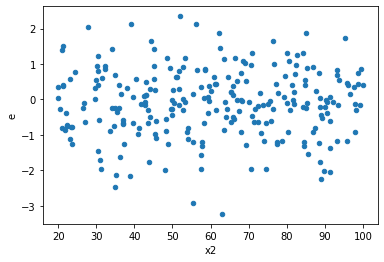

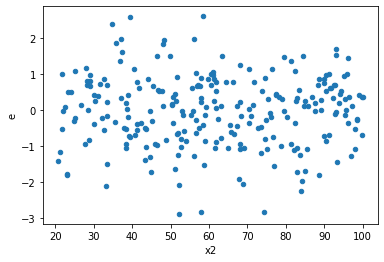

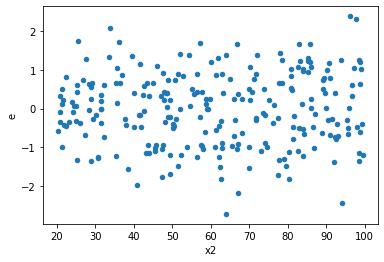

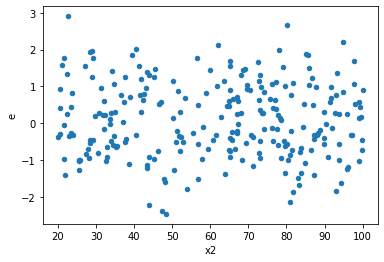

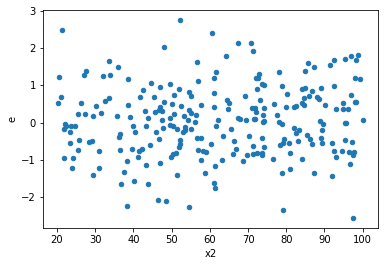

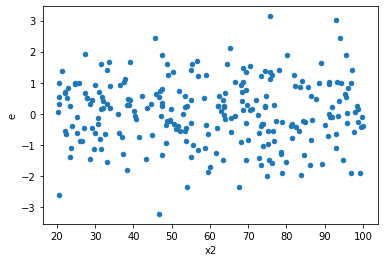

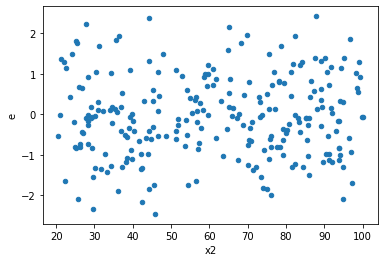

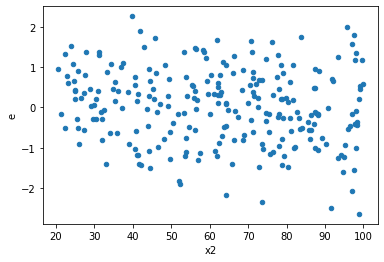

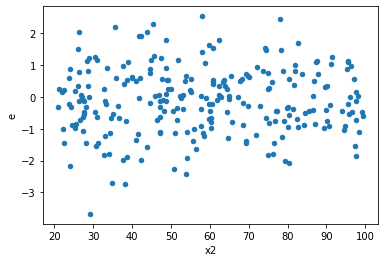

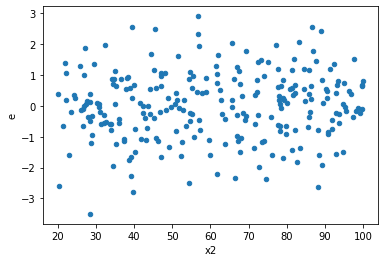

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
5.0,97.0,97.0,123.24747980137207,121.4166908114411,1.2838279145976257,1.2647571959525115,1.0150785610915236,0.9414010745763055,0.5292994627118472,Reject005=1 : Homoscedasticity
7.0,97.0,97.0,111.59361794286211,95.62102378382734,1.162433520238147,0.9960523310815348,1.1670406101815476,0.4482423491214156,0.7758788254392922,Reject005=1 : Homoscedasticity
12.0,97.0,97.0,94.96343483414451,65.54303136282412,0.9892024461890053,0.6827399100294179,1.4488715712347657,0.06936396495042252,0.9653180175247887,Reject005=1 : Homoscedasticity
15.0,97.0,97.0,120.59243450575858,91.60992436837819,1.2561711927683186,0.9542700455039395,1.3163686722503674,0.17765290741122275,0.9111735462943886,Reject005=1 : Homoscedasticity
17.0,97.0,97.0,88.9820060894843,73.42918937596725,0.9268958967654615,0.7648873893329923,1.2118070054387302,0.3457383028928611,0.8271308485535694,Reject005=1 : Homoscedasticity
21.0,97.0,97.0,97.80367708463864,95.57371671283767,1.0187883029649858,0.995559549092059,1.0233323600723947,0.9098045973487792,0.5450977013256104,Reject005=1 : Homoscedasticity
22.0,97.0,97.0,123.08151724644465,79.19424133293576,1.2820991379837985,0.8249400138847475,1.5541725657678191,0.03099405353772222,0.9845029732311389,Reject005=0 : Heteroscedasticity
23.0,97.0,97.0,94.68666926730266,81.79635749076898,0.9863194715344027,0.8520453905288435,1.157590290961164,0.47246812415572625,0.7637659379221369,Reject005=1 : Homoscedasticity
26.0,97.0,97.0,105.47067770883537,84.09944001661691,1.0986528928003685,0.8760358335064261,1.2541186681860876,0.26656751466797757,0.8667162426660112,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,104.12069128363544,121.81667397058223,1.0845905342045359,1.268923687193565,0.8547326723825982,0.44095193816883865,Reject005=1 : Homoscedasticity
1.0,97.0,97.0,87.15393937180947,104.01480165947628,0.9078535351230154,1.0834875172862113,0.8378993949066412,0.3853310598295875,Reject005=1 : Homoscedasticity
2.0,97.0,97.0,83.5976393056576,84.25349278266027,0.8708087427672666,0.8776405498193779,0.9922157117130501,0.9693814789536848,Reject005=1 : Homoscedasticity
3.0,97.0,97.0,82.68977178375155,89.14294548060269,0.8613517894140786,0.928572348756278,0.9276087001381916,0.7120890562438981,Reject005=1 : Homoscedasticity
4.0,97.0,97.0,82.41873739023303,85.60460873551668,0.8585285144815941,0.8917146743282988,0.9627838805370085,0.8522258566393056,Reject005=1 : Homoscedasticity
5.0,97.0,97.0,123.24747980137207,121.4166908114411,1.2838279145976257,1.2647571959525115,1.0150785610915236,1.0585989254236945,Reject005=1 : Homoscedasticity
6.0,97.0,97.0,97.52624392954587,108.97916360410619,1.0158983742661027,1.1351996208761062,0.894907252948225,0.5855899097120377,Reject005=1 : Homoscedasticity
7.0,97.0,97.0,111.59361794286211,95.62102378382734,1.162433520238147,0.9960523310815348,1.1670406101815476,0.4482423491214156,Reject005=1 : Homoscedasticity
8.0,97.0,97.0,86.88994791816862,88.21616802632107,0.9051036241475897,0.9189184169408445,0.9849662466889657,0.9406901782548679,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      940
Reject005=0 : Heteroscedasticity     60
Name: Result_test, dtype: int64